In [1]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.preprocessing import image

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

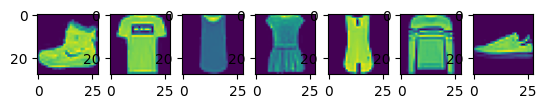

In [5]:
for i in range(7):
    plt.subplot(4,7,i+1)
    plt.imshow(x_train[i])
plt.show()

In [6]:
input_shape = (28, 28, 1)

In [7]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      # Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      # MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [8]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [10]:
model_5 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ), MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ), MaxPooling2D( (2,2), strides = 2),
      Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'relu' ), MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(128,activation = 'ELU'), # количество входных нейронов
      Dense(128,activation = 'ELU'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [11]:
model_5.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
%%time

history = model_5.fit(x_train, y_train_cat, batch_size=32, epochs=10,validation_data =(x_test, y_test_cat) )

Epoch 1/10
1875/1875 [==============================] - 130s 68ms/step - loss: 0.4134 - accuracy: 0.8483 - val_loss: 0.3470 - val_accuracy: 0.8753
Epoch 2/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.2661 - accuracy: 0.9018 - val_loss: 0.2640 - val_accuracy: 0.9007
Epoch 3/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.2242 - accuracy: 0.9158 - val_loss: 0.2634 - val_accuracy: 0.9054
Epoch 4/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.1967 - accuracy: 0.9267 - val_loss: 0.2513 - val_accuracy: 0.9083
Epoch 5/10
1875/1875 [==============================] - 123s 65ms/step - loss: 0.1730 - accuracy: 0.9347 - val_loss: 0.2464 - val_accuracy: 0.9137
Epoch 6/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.1529 - accuracy: 0.9431 - val_loss: 0.2509 - val_accuracy: 0.9110
Epoch 7/10
1875/1875 [==============================] - 125s 67ms/step - loss: 0.1350 - accuracy: 0.9487 - val_loss: 0

Установил количество нейронов в скрытом слое на 512

Изменил количество эпох на 1, получил:
loss: 0.0895 - accuracy: 0.9662 - val_loss: 0.3288 - val_accuracy: 0.9106

Изменил количество эпох на 5, получил:
loss: 0.0572 - accuracy: 0.9782 - val_loss: 0.4748 - val_accuracy: 0.9105

Изменил количество эпох на 10, получил:
loss: 0.0378 - accuracy: 0.9869 - val_loss: 0.6157 - val_accuracy: 0.9174

Что явно выше точности при количестве нейронов равном 128 в скрытом слое:
loss: 0.0870 - accuracy: 0.9669 - val_loss: 0.3175 - val_accuracy: 0.9184

Результат при добавлении второго скрытого слоя со 128 нейронами:
loss: 0.0965 - accuracy: 0.9630 - val_loss: 0.3003 - val_accuracy: 0.9169

При изменении параметров модели, необходимо перезапускать весь проект или достаточно блока с изменениями? Я перезапускал весь проект целиком

Таким образом помгает повыситьт точность увеличение нейронных связей.